#### create open with link

<a href="https://colab.research.google.com/github/Daviedavie100/freeCodeCamp/blob/main/boilerplate_sea_level_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### install scipy

In [ ]:
%conda install scipy

In [1]:
#load imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# read the dataset
df=pd.read_csv('C:/Users/Davie/Documents/GitHub/freeCodeCamp/data/epa-sea-level.csv')
df.head(10)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
5,1885,0.531496,-0.330709,1.393701,NaN
6,1886,0.437008,-0.381890,1.255906,NaN
7,1887,0.216535,-0.602362,1.035433,NaN
8,1888,0.299213,-0.519685,1.118110,NaN
9,1889,0.362205,-0.456693,1.181102,NaN


In [3]:
#define data for x axis
x=df['Year']
x_pred = pd.Series([i for i in range (1880, 2050)])
x

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, Length: 134, dtype: int64

In [4]:
#define data for y axis
y = df['CSIRO Adjusted Sea Level']
y

0      0.000000
1      0.220472
2     -0.440945
3     -0.232283
4      0.590551
         ...   
129    8.586614
130    8.901575
131    8.964567
132    9.326772
133    8.980315
Name: CSIRO Adjusted Sea Level, Length: 134, dtype: float64

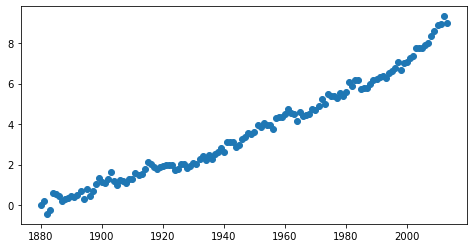

In [8]:
# Create scatter plot
'''Use matplotlib to create a scatter plot using the Year column as the x-axis and the 
CSIRO Adjusted Sea Level column as the y-axix.'''

fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(x, y)
plt.show();

In [ ]:


# Create scatter plot
fig= plt.figure(figsize=(8,4))
plt.plot(x, y, 'o', label='original data')

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Plot linear regression line.
# Create first line of best fit
#lineA = linregress(x, y)
#yA = x_first*lineA.slope + lineA.intercept

#plt.plot(x_first,yA);
y_pred=intercept + slope*x_pred
plt.plot(x_pred,y_pred, color="r", label="Fitted line")


# Create first line of best fit

#find line of best fit
#a, b = np.polyfit(x, y, 1)
#a,b,c= np.polyfit(x,y, 2)
#slope, intercept, r, p, se = linregress(x, y)
#res = stats.linregress(x, y)

#add points to plot
#plt.scatter(x, y)

#add line of best fit to plot
#plt.plot(x, a*x+b)     

#add line of best fit to plot
#plt.plot(x, a*x**2+b*x+c, color='red', linestyle='-', linewidth=1)

#add fitted regression equation to plot
#plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

# Add labels and title
plt.title('Rise in Sea Level')
plt.xlabel('Y ear')
plt.ylabel('Sea Level (inches)')
plt.legend()
plt.show();



In [ ]:
# Create scatter plot


  # Create first line of best fit


  # Create second line of best fit


  # Add labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

In [ ]:
# Create first line of best fit
lineA = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
xA = np.arange(df['Year'].min(),2050,1)
yA = xA*lineA.slope + lineA.intercept

plt.plot(xA,yA);

plt.plot(x, y, 'o', label='original data')
#plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
#plt.xlim(1875,2055)
#plt.legend();
#plt.show();

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


def draw_plot():
  # Read data from file
  df = pd.read_csv('epa-sea-level.csv')

  #define data
  x = df['Year']
  y = df['CSIRO Adjusted Sea Level']

  # Create scatter plot
  fig, ax = plt.subplots()
  plt.scatter(x, y)

  # Get slope, intercept from linregress
  res = linregress(x, y)

  # Create first line of best fit
  x_pred = pd.Series([i for i in range(1880, 2051)])
  y_pred = res.intercept + res.slope * x_pred
  plt.plot(x_pred, y_pred, color="r")

  # Create second line of best fit
  df_2000 = df.loc[df['Year'] >= 2000]
  x_2000 = df_2000['Year']
  y_2000 = df_2000['CSIRO Adjusted Sea Level']
  res_2000 = linregress(x_2000, y_2000)
  x_pred2000 = pd.Series([i for i in range(2000, 2051)])
  y_pred2000 = res_2000.intercept + res_2000.slope * x_pred2000
  plt.plot(x_pred2000, y_pred2000, color="r")

  # Add labels and title
  plt.title('Rise in Sea Level')
  plt.xlabel('Year')
  plt.ylabel('Sea Level (inches)')

  # Save plot and return data for testing (DO NOT MODIFY)
  plt.savefig('sea_level_plot.png')
  return plt.gca()

In [ ]:
conda update -n base -c defaults conda